# **Machine Learning Practice Project: SuperKart**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. 
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [1]:
# This will help in making the Python code more structured automatically (good coding practice)
#% Load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

# Import library for preparing data
from sklearn.model_selection import train_test_split


# Import libraries for evaluating the models
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [2]:
kart = pd.read_csv("SuperKart.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [4]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


**Observation:**

* The sales of the store is indicated by the variable Product_Store_Sales_Total is the target variable and the rest of the variables are independent variables based on which we will predict the total sales of the stores for the upcoming quarter.

In [5]:
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Understand the shape of the dataset**

In [6]:
data.shape

(8763, 12)

- There are 8763 rows and 12 columns.

### **Check the data types of the columns for the dataset**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observations:**
* Product_Weight, Product_Allocated_Area, Product_MRP, Store_Establishment_Year, Product_Store_Sales_Total are the numeric columns while the rest are object ones.
* There are a total of **8763 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.

### **Checking for missing values in the dataset** ###

In [8]:
# Checking for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observation:**
* There are no missing values in the data

In [9]:
# Checking for duplicate values
data.duplicated().sum()

0

**Observation:**
* There are no duplicate values in the data. 

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data.**

In [10]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD6114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- There are 16 different product types and fruits and vegetables have been sold the highest number of times (1249).
- There are 4 unique stores in the dataset.
- The revenue generated from the sale of a particular product at a certain outlet varies from 33 to 8000 with 50% of the values lying above 2762.
- The 75th percentile of Store_Id is 0. It indicates that the vast majority of these stores doesn't have unique identifier.
- The mean store sales is approx. USD 34,640, whereas the median of the store sales is approx. USD 34,523. This indicates that the Product_Store_Sales_Total distribution is only slightly skewed towards the right side.

**Let's check the count of each unique category in each of the categorical variables**

In [11]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

**Observations:**
- We can observe that in the Product_Sugar_Content column, there are 3 types - Low Sugar, Regular and reg. It seems quite obvious that Regular and reg are referring to the same category. So let's replace reg with Regular.
- The products with low sugar content are more when compared to low sugar and regular in the data.

In [12]:
# Replacing reg with Regular in Product_Sugar_Content feature
data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [13]:
data.Product_Sugar_Content.value_counts()

Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

**Observation:**
- We can see that the Product_Id column has two characters followed by a number. Let's delve deeper and see whether they are having any relationship with the other columns or not.

In [14]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [15]:
data["Product_Id_char"].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [16]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique()

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

**Observation:**
- We can see that FD is being used in the Product_Id of the food items.

In [17]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

**Observation:**
- We can see that DR is being used in the Product_Id of the drinks.

In [18]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique()

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

**Observation:**
- We can see that DR is being used in the Product_Id of the drinks.

**The Product_Id column will not add any value to our analysis so let's drop it before we move forward.**

In [19]:
## Dropping both the columns
data = data.drop(["Product_Id"], axis = 1)

In [20]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


## **Univariate Analysis**

In [21]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Product_Weight**

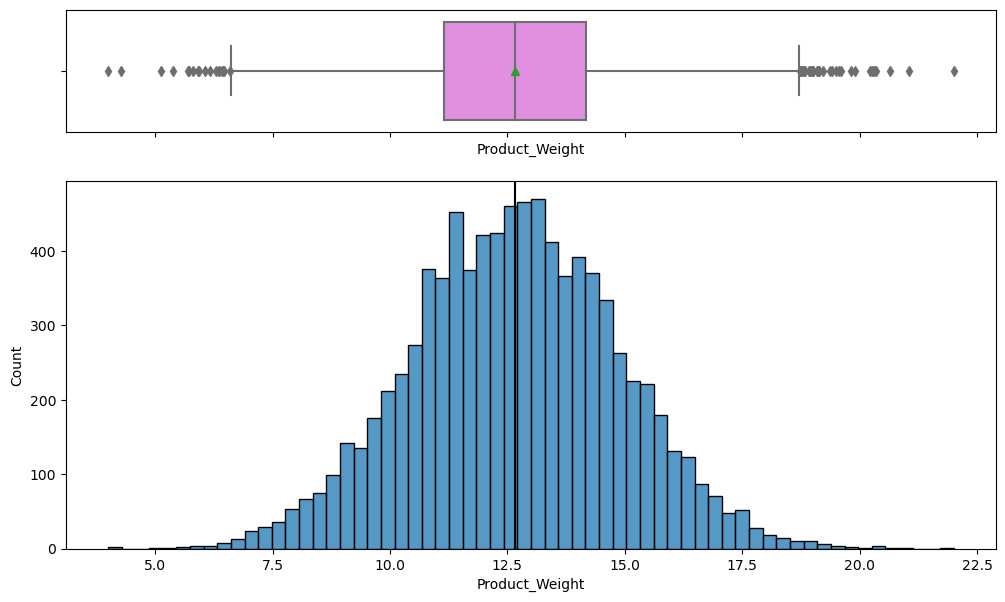

In [22]:
histogram_boxplot(data, "Product_Weight")

**Observation:**
- The product weight is uniformly distributed with mean and median lying around 12.5.

**Product_Allocated_Area**

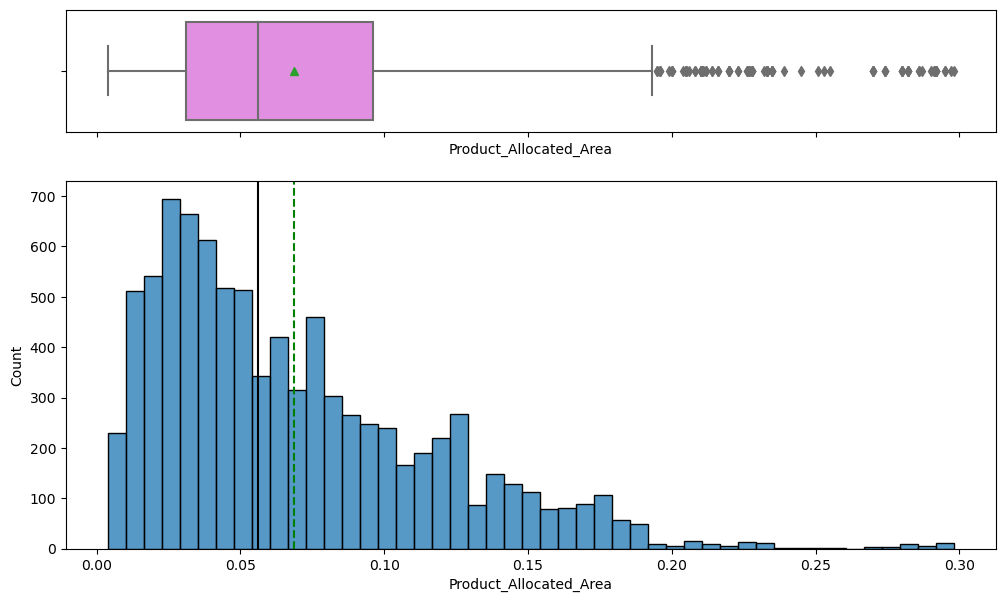

In [23]:
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:**
- The distribution is right skewed with the median lying around 0.05.

**Product_MRP**

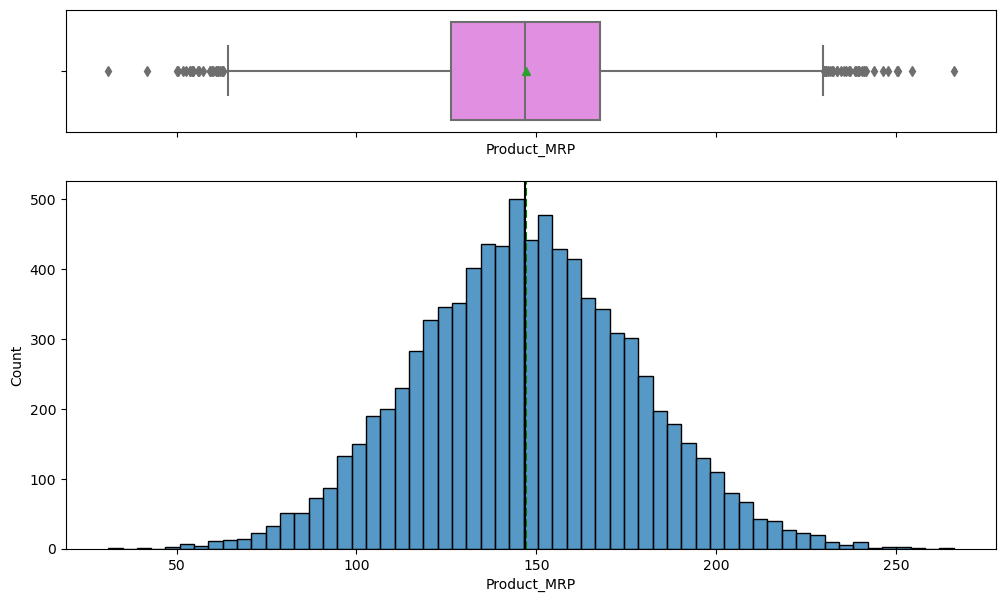

In [24]:
histogram_boxplot(data, "Product_MRP")

**Observation:**
- The product MRP is uniformly distributed with mean and median lying around 150.

**Product_Store_Sales_Total**

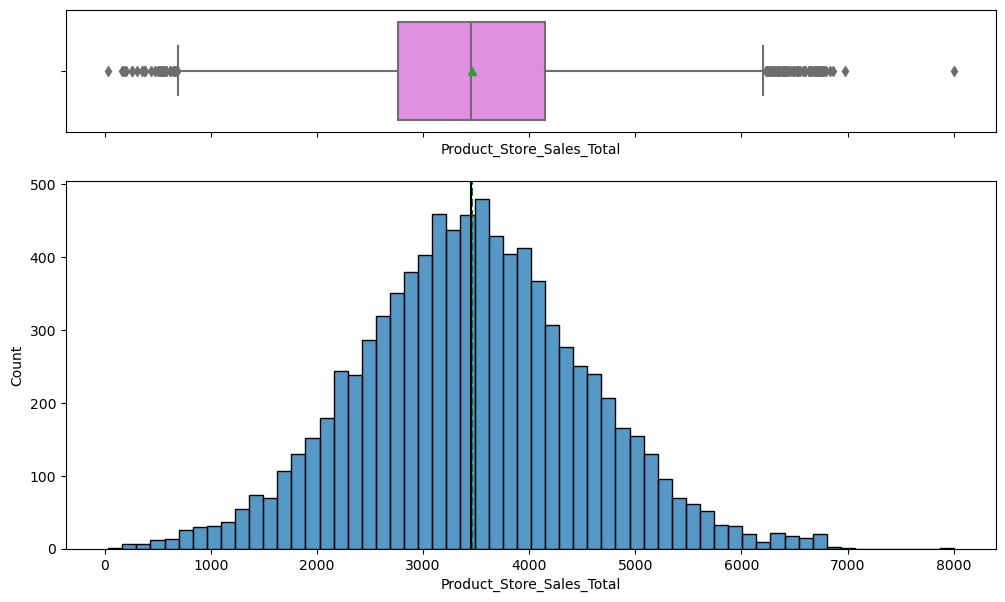

In [25]:
histogram_boxplot(data, "Product_Store_Sales_Total")

**Observation:**
- The revenue generated from each product at a particular store is normally distributed with mean and median lying around 3500.

In [26]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**Product_Sugar_Content**

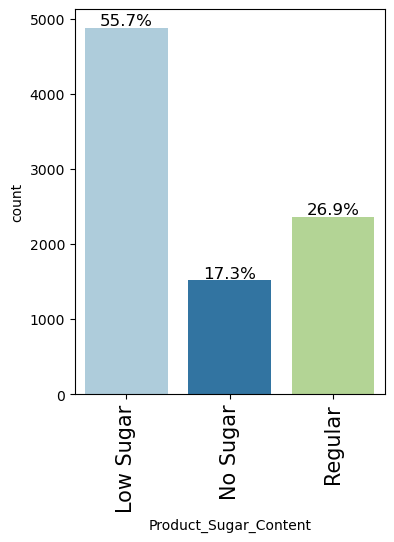

In [27]:
labeled_barplot(data, "Product_Sugar_Content", perc = True)

**Observations:**
- Around 56% of the products are having low sugar followed by 27% products which are having regular sugar content.
- Arounnd 17% of the products are having no sugar content.

**Product_Type**

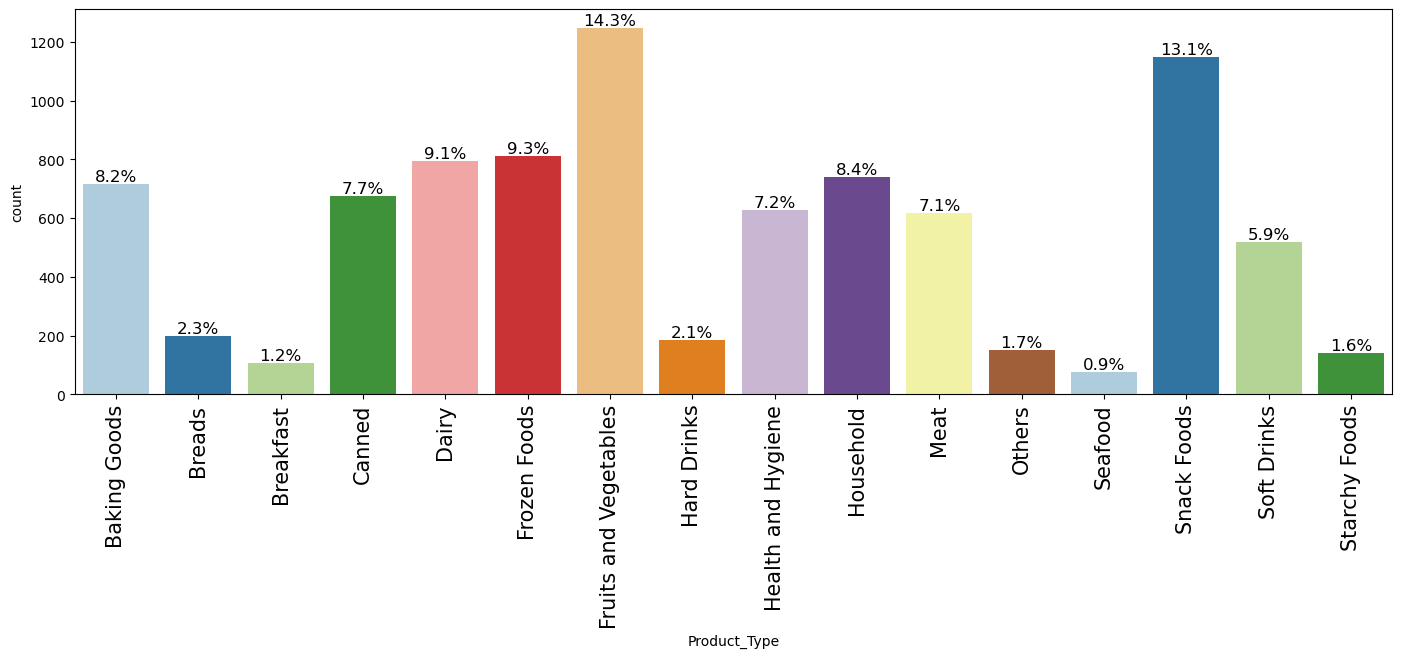

In [28]:
labeled_barplot(data, "Product_Type", perc = True)

**Observations:**
- Fruits and vegetables (14%) and Snack Foods (13%) have been bought the highest number of times from all the stores combined.
- Seafood (1%) has been bought the lowest number of times.
- The highest product type which is Fruits and Vegetables is 14 times of the lowest product type which is sea food.

**Store_Id**

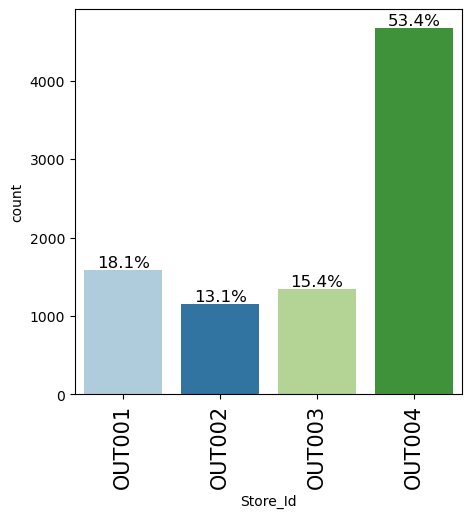

In [29]:
labeled_barplot(data, "Store_Id", perc = True)

**Observations:**
- Around 53% of the products are being sold from outlet OUT004. Almost equal number of products have been sold from the other three stores each.
- When compared to the four Store_Ids the products which are being sold from outlet OUT002 is low.

**Store_Size**

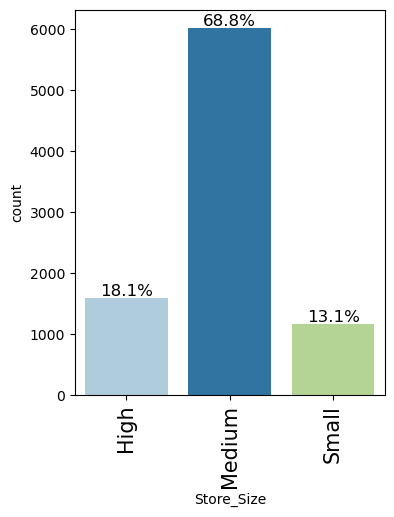

In [30]:
labeled_barplot(data, "Store_Size", perc = True)

**Observations:**
- Around 69% of the products have been sold from the stores which are medium in size
- The products that have been sold from the stores which are high and small are almost same in size.

**Store_Location_City_Type**

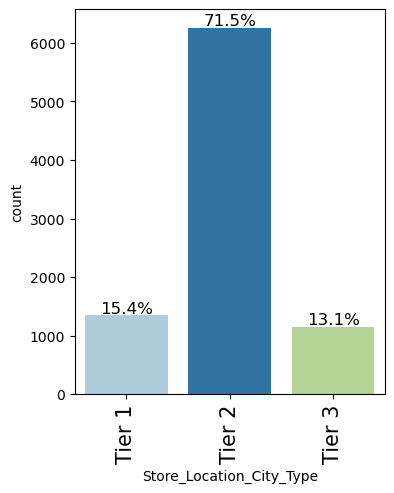

In [31]:
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:**
- Around 72% of the products have been sold from the stores which are located in the Tier 2 cities.
- The products that have been sold from the stores which are located in the Tier 1 and Tier 3 cities are almost same.

**Store_Type**

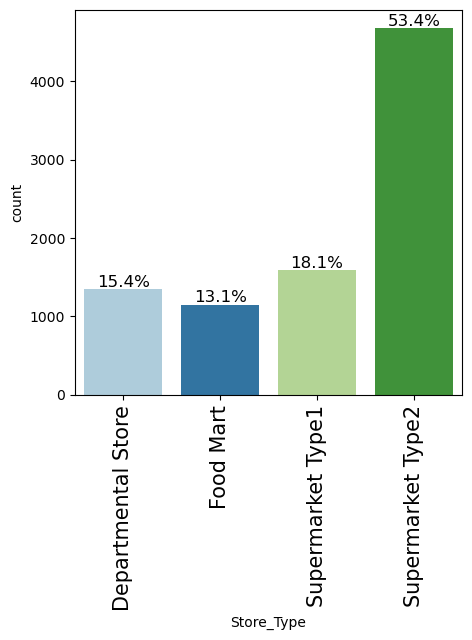

In [32]:
labeled_barplot(data, "Store_Type", perc = True)

**Observations:**
- Around 53% of the products have been sold from stores which are of Supermarket Type2.
- The products that have been sold from stores which are of Supermarket Type1, Food Mart and Departmental Store are almost same.

### **Bivariate Analysis**

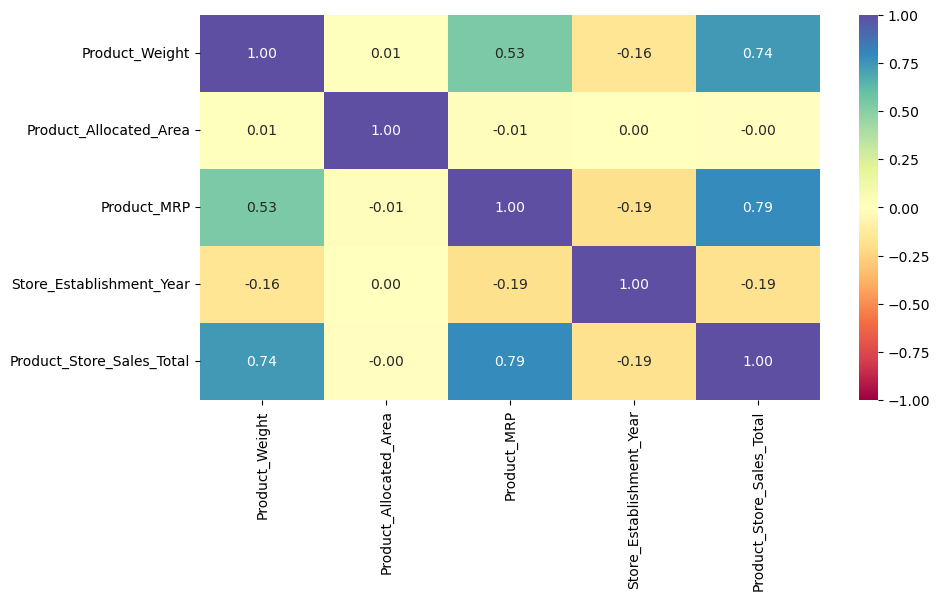

In [33]:
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (10, 5))
sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)
plt.show()

**Observations:**
- Product weight and product MRP are highly correlated with our target variable i.e Product_Store_Sales_Total
- Product weight and product MRP are moderately correlated with each other.
- There is not much correlation among the rest of the variables.
- Store_Establishment_Year is highly negatively correlated with our target variable i.e Product_Store_Sales_Total

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns** 

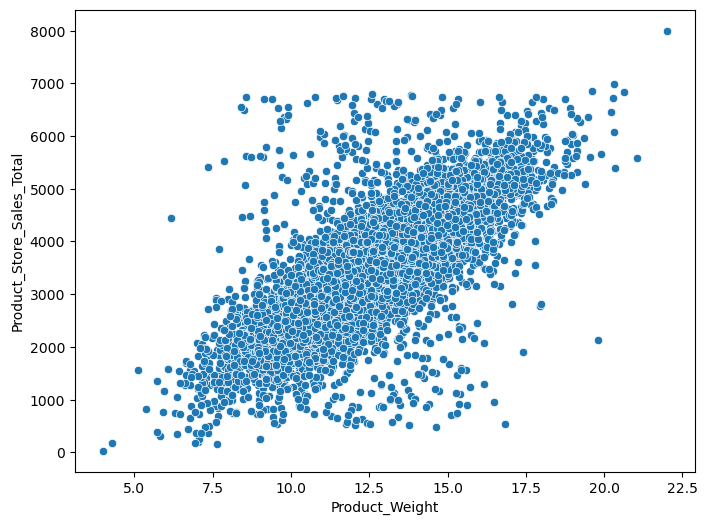

In [34]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- Product_Weight and Product_Store_Sales_Total are almost linearly correlated with each other.  

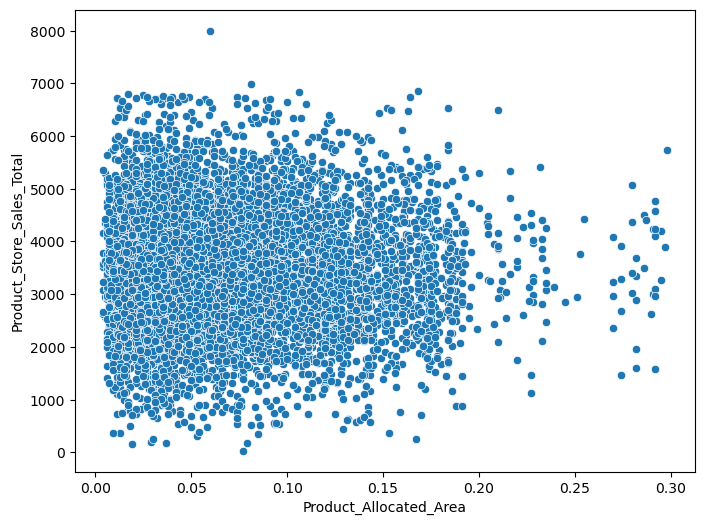

In [35]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- There seem to be no relationship between Product_Allocated_Area and Product_Store_Sales_Total.

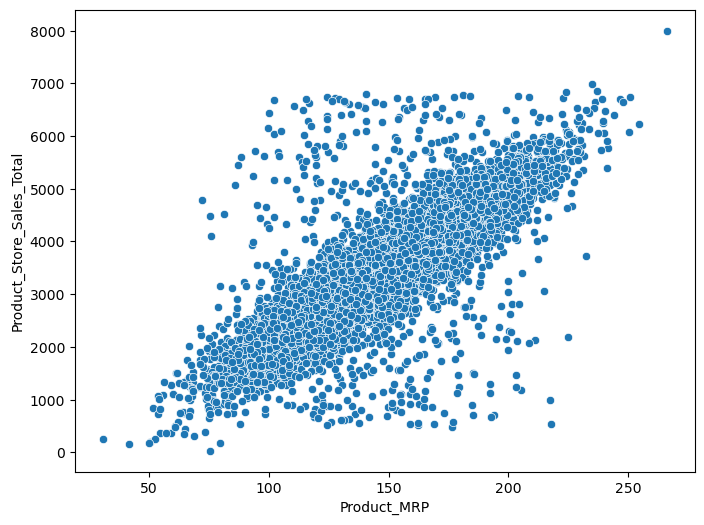

In [36]:
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)
plt.show()

**Observation:**
- Product_MRP and Product_Store_Sales_Total are almost linearly correlated with each other.

**Let us see from which product type the company is generating most of the revenue**

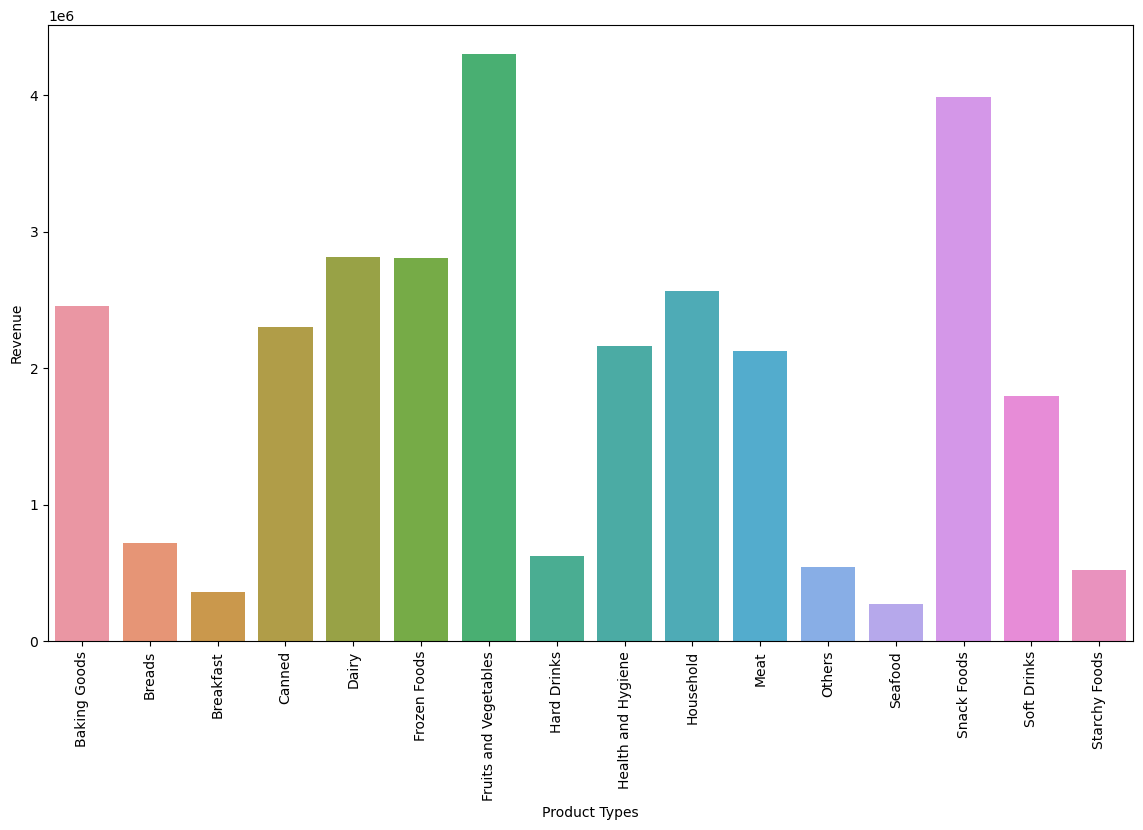

In [37]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)
a.set_xlabel("Product Types")
a.set_ylabel("Revenue")
plt.show()

**Observations:**
- Fruits and vegetables and snack foods are the biggest contributors to the revenue of the company(SuperKart).
- Seafoods are the lowest contributors to the revenue of the company(SuperKart).
- Dairy and Frozen foods are contributing almost same to the revenue of the company.

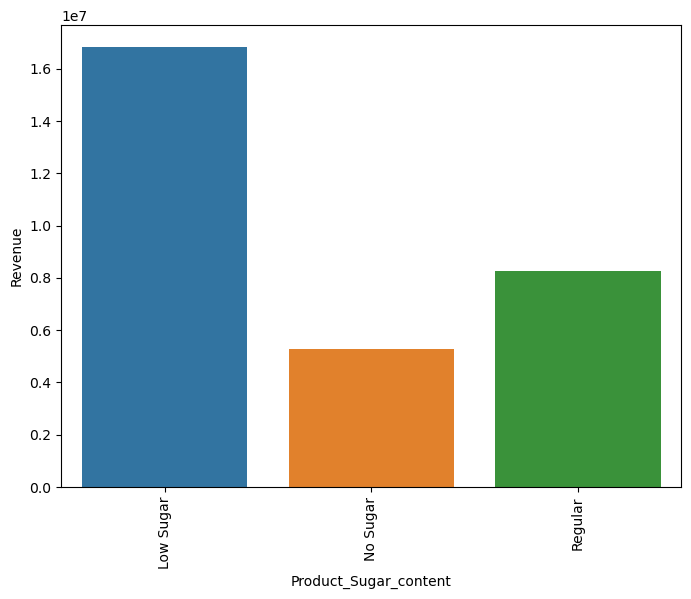

In [38]:
df_revenue2 = data.groupby(["Product_Sugar_Content"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
b = sns.barplot(
    x = df_revenue2.Product_Sugar_Content, y = df_revenue2.Product_Store_Sales_Total
)
b.set_xlabel("Product_Sugar_content")
b.set_ylabel("Revenue")
plt.show()

**Observations:**
- Low sugar content materials are the biggest contributors to the revenue of the company(SuperKart).
- No Sugar content materials are the lowest contributors to the revenue of the company(SuperKart).

**Let us see from which type of stores and locations the revenue generation is more**.

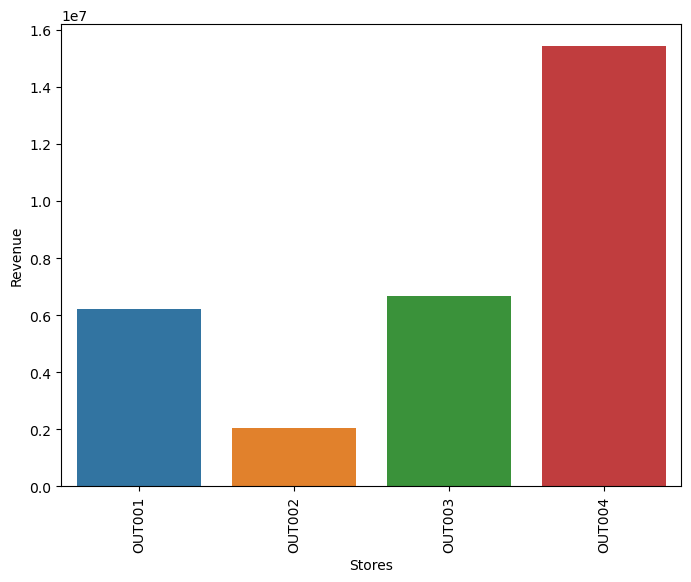

In [39]:
df_store_revenue = data.groupby(["Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
r = sns.barplot(
    x = df_store_revenue.Store_Id, y = df_store_revenue.Product_Store_Sales_Total
)
r.set_xlabel("Stores")
r.set_ylabel("Revenue")
plt.show()

**Observations:**
- OUTOO4 is contributing the most to the revenue of the company which is more than double of the contribution being made by second-placed store OUT003.
- OUT002 is contributing the least to the revenue of the company which is two times less than the OUT001 and OUT003.

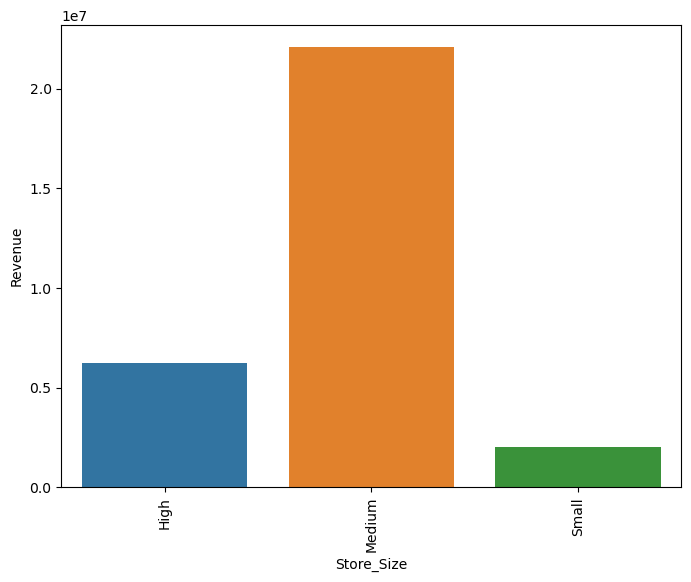

In [40]:
df_revenue3 = data.groupby(["Store_Size"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
c = sns.barplot(x = df_revenue3.Store_Size, y = df_revenue3.Product_Store_Sales_Total)
c.set_xlabel("Store_Size")
c.set_ylabel("Revenue")
plt.show()

**Observations:**
- The medium sized stores are contributing heavily to the revenue.
- The high sized stores are contributing the least to the revenue.

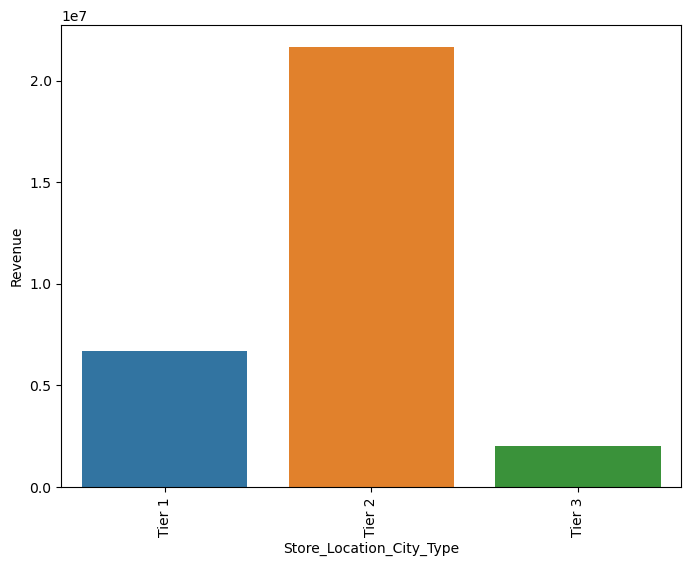

In [41]:
df_revenue4 = data.groupby(["Store_Location_City_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
d = sns.barplot(
    x = df_revenue4.Store_Location_City_Type, y = df_revenue4.Product_Store_Sales_Total
)
d.set_xlabel("Store_Location_City_Type")
d.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores in the Tier 2 cities are contributing the most to the revenue of SuperKart.
- Stores in the Tier 3 cities are contributing the least to the revenue of SuperKart.

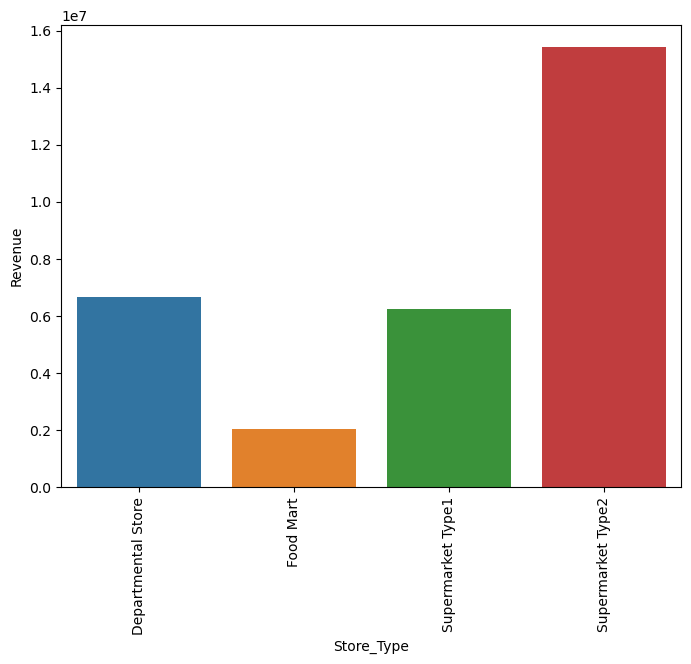

In [42]:
df_revenue5 = data.groupby(["Store_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()
plt.figure(figsize = [8, 6])
plt.xticks(rotation = 90)
e = sns.barplot(x=df_revenue5.Store_Type, y = df_revenue5.Product_Store_Sales_Total)
e.set_xlabel("Store_Type")
e.set_ylabel("Revenue")
plt.show()

**Observations:**
- Stores of Supermarket Type 2 are performing exceptionally well.
- Stores of SuperKart Type 1 and Depaetmental Store are almost contributing same revenue to the company.

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.** 

In [43]:
# Outlet Age
data["Store_Age_Years"] = 2022 - data.Store_Establishment_Year

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [44]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [45]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [46]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [47]:
data["Product_Type_Category"] = pd.Series(change1)

In [48]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD,13,Non Perishables
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD,23,Perishables
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD,35,Non Perishables
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD,35,Non Perishables
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC,24,Non Perishables


### **Outlier Check**

- Let's check for outliers in the data.

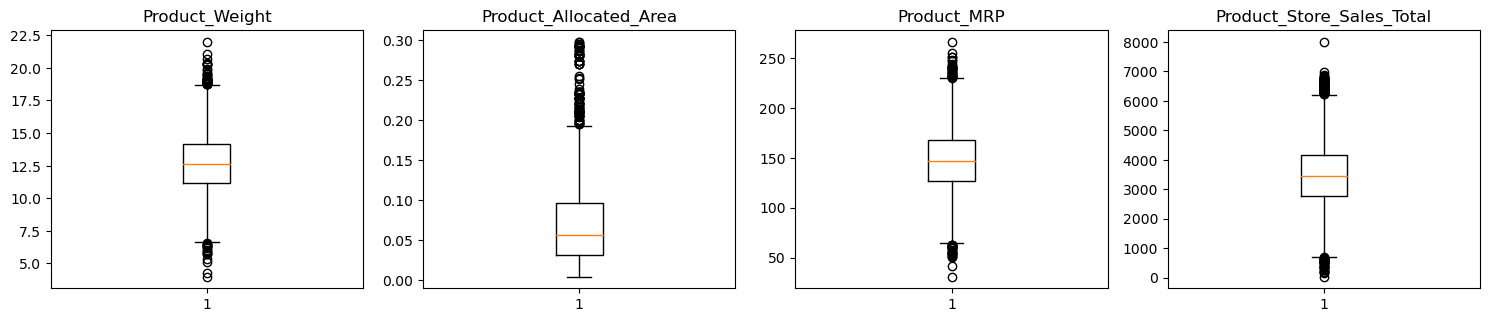

In [49]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

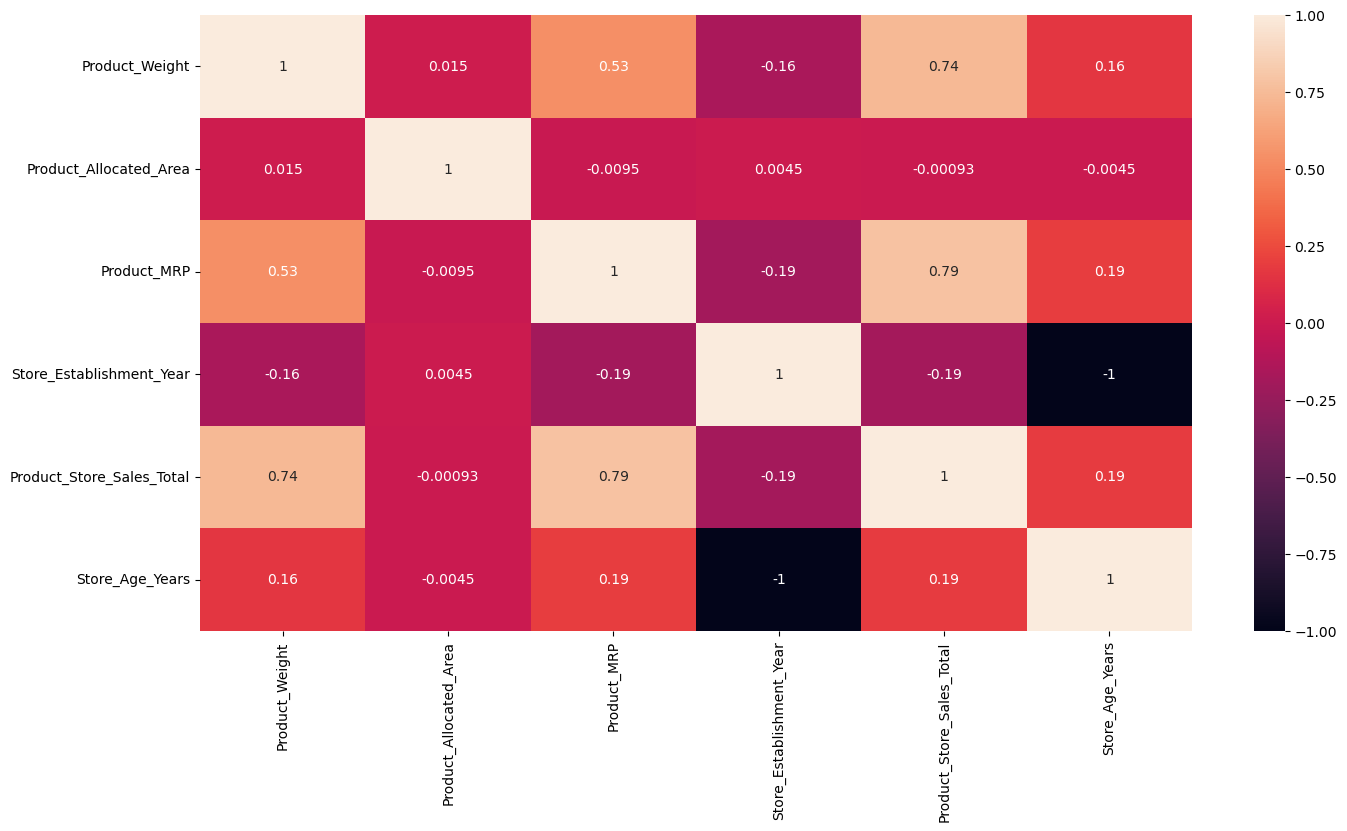

In [50]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**
- We observe the high co-relation between the two variables Store_Size_Medium and Store_Type_Supermarket with respect to Store_Age_Years.

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [51]:
data = data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"], axis = 1)

In [52]:
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [53]:
# Separating features and the target column
X = data.drop(["Product_Store_Sales_Total"], axis = 1)
y = data["Product_Store_Sales_Total"]

In [54]:
X = sm.add_constant(X)

In [55]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)

# Modeling

### Linear Regression

In [56]:
# Apply Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [57]:
# Prediction on test dataset
y_pred_linear = linear_reg.predict(X_test)
y_pred_linear

array([3549.62152778, 5736.35630491, 4813.76974836, ..., 3183.36836287,
       3246.06262203, 3432.46816619])

In [58]:
# Evaluate Linear Regression
mse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression - Root Mean Squared Error:", mse_linear)
print("Linear Regression - R^2 Score:", r2_linear)

Linear Regression - Root Mean Squared Error: 446.68528691388184
Linear Regression - R^2 Score: 0.8256412617808925


- The R^2 score is quite robust, which suggests that the model has a good fit to the data.

### Random Forest Regression

In [59]:
# Apply Random Forest Regression
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=1)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [60]:
# Prediction on test dataset
y_pred_rf = random_forest_reg.predict(X_test)
y_pred_rf

array([3718.958 , 5929.6656, 4512.2621, ..., 3109.9806, 3139.053 ,
       3535.2746])

In [61]:
# Evaluate Random Forest Regression using RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression - Root Mean Squared Error:", rmse_rf)
print("Random Forest Regression - R^2 Score:", r2_rf)

Random Forest Regression - Root Mean Squared Error: 297.531353304105
Random Forest Regression - R^2 Score: 0.922641881691033


- The R^2 score is quite better then our previous model, which suggests that the model has a good fit to the data. 

# Conclusion

- `Lower RMSE:` The Random Forest model's lower RMSE compared to the Linear Regression model indicates that it is making more accurate predictions. Since RMSE penalizes larger errors more severely, this also suggests that the Random Forest model has fewer large errors in its predictions than the Linear Regression model.

- `Higher R^2 Score:` An R^2 score of over 90% is typically considered very high and indicates that the model's predictions closely match the observed data. 

- `Model Comparison:` When comparing the two models, the Random Forest Regression not only has a higher R^2 score but also a lower RMSE, which generally suggests that it is the better model for this problem.